In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from scipy.stats import mode

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('iphone_purchase_records.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
data.columns

Index(['Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [11]:
data.drop('Gender', axis=1)
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
X = data.drop('Purchase Iphone', axis=1)
Y = data['Purchase Iphone']
X

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [27]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

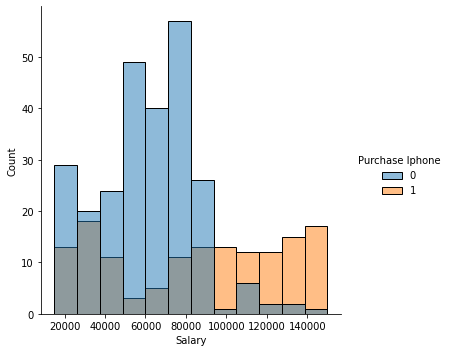

In [13]:
sns.displot(data, x = 'Salary', hue='Purchase Iphone')

In [16]:
# Distance between two points
def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum((pt1-pt2)**2))
    return distance

In [17]:
# have to use numpy because we are using numpy functions inside out function
a = np.array([3, 4])
b = np.array([4, 5])
print(euclidean_distance(a, b))

1.4142135623730951


In [21]:
def KNN(X_train, X_test, Y_train, Y_test, k_val):
    y_hat = []
    
    # Calculate distances from test point to the points in the training data
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance(np.array(X_train.iloc[i]), test_pt))
        
        # Create DataFrame for distances
        distance_data = pd.DataFrame(data = distances, columns=['distance'], index = Y_train.index)
        
        # Sort by distance, and then get every value until k_val
        k_nearest_neighbors_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]
        
        # list of labels using k_nearest_neighbor_list to locate in y_train to see if it is 1 or 0
        labels = Y_train.loc[k_nearest_neighbors_list.index]
        
        # Found the most common number in our list, 1 or 0
        voting = mode(labels).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42)
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, 3)

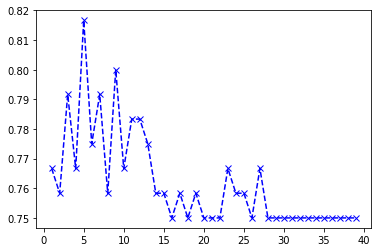

In [28]:
accuracy_vals = []

for i in range(1, 40):
    y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val=i)
    accuracy_vals.append(accuracy_score(Y_test, y_hat_test))

plt.plot(range(1, 40), accuracy_vals, color='blue', linestyle='dashed', marker='x')

0.775


Text(0.5, 1.0, 'KNN Test Data')

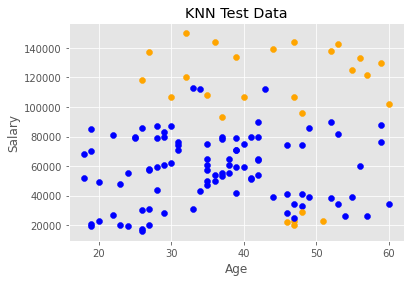

In [30]:
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, 6)
print(accuracy_score(Y_test, y_hat_test))
for i in range(len(y_hat_test)):
    if(y_hat_test[i] == 0):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='blue')
    if(y_hat_test[i] == 1):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='orange')
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Test Data')